In [1]:
import scipy.io
from scipy.spatial import distance
import numpy as np
import matplotlib.pyplot as plt

# STRATEGY-1

K value: 2

Initial Cluster Centers: [(6.39627447073223, 1.241256630339045), (1.8122961819435377, 3.407816965599197)]

Final Cluster Centers: [(6.8071367414942845, 5.401124256878568), (3.0168234306748127, 4.477419275898857)]

K value: 3

Initial Cluster Centers: [(7.680975562305557, 0.8354204302427147), (4.504968717235023, 4.721469701706701), (2.706995821388748, 1.6400256872214984)]

Final Cluster Centers: [(7.2397511895844495, 2.4820826910731952), (4.830919584356354, 7.299599586723327), (3.234890046359086, 2.5530321964002036)]

K value: 4

Initial Cluster Centers: [(4.504968717235023, 4.721469701706701), (2.4817741956340473, 1.6740254700990456), (5.142553970687584, 8.374513071967938), (3.140094860555918, 0.3458948748535594)]

Final Cluster Centers: [(2.9054774114449513, 6.905122763339948), (3.2285300905383707, 2.5240486292057867), (6.6259253846324615, 7.576149167622678), (7.252626831256577, 2.4001582635520533)]

K value: 5

Initial Cluster Centers: [(6.215390304639243, 6.2613922544235

Final Cluster Centers: [(7.056682932407747, 1.333196794745837), (7.986758244802879, 3.012729309091755), (4.818330576085663, 3.69502320071854), (2.242047519125402, 3.251007486318421), (7.914309977818314, 8.519909807700076), (3.1690614508664035, 0.8143251472991676), (2.536501078790139, 6.859419784482168), (6.15468228405522, 5.701407205679413), (4.859398750231154, 7.941638208906054)]

K value: 10

Initial Cluster Centers: [(7.771269867371587, 8.91428052368416), (3.2881521039509574, 0.7179685512304835), (4.758510501654859, 8.243174587119283), (3.8427898922439203, 5.535466947744628), (3.96493610324121, 5.200275666104828), (7.943759540885144, 8.211650627973299), (7.752617155925618, 8.672893622520087), (3.1834039230512237, 5.421840131568017), (3.0999940868022384, 0.8385498984419097), (7.930198659853915, 8.140066340774522)]

Final Cluster Centers: [(8.411270107798906, 8.974903831852108), (7.556167822397726, 2.235167959857534), (4.723985303441374, 7.10486213107456), (2.597440222516299, 4.543642

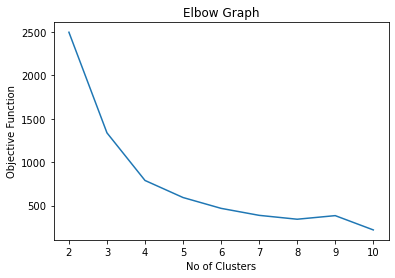

Second Initialization


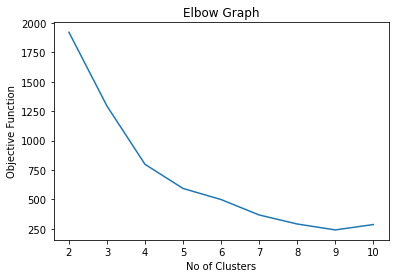

In [2]:
file = scipy.io.loadmat('AllSamples.mat')
Samp_X = []
Samp_Y = []
data = file.get('AllSamples')

for sample in data:
    Samp_X.append(sample[0])
    Samp_Y.append(sample[1])
objfunc1 = []
objfunc2 = []
for x in range(0, 2):

    K_Values = [2, 3, 4, 5, 6, 7, 8, 9, 10]
    # implement for k from 2 to 10
    for k in range(2, 11):
        print("K value:", k)
        centroids_array = []
        # Selecting initial samples from clusters
        indices = np.random.choice(300, size=k, replace=False, p=None)

        for index in indices:
            centroids_array.append((data[index][0], data[index][1]))
        print("")
        print("Initial Cluster Centers:", centroids_array)
        print("")

        final_centroids = []
        final_cluster_matrix = []
        Stop_Cond = False
        while (Stop_Cond != True):
            # create a distances matrix
            distances = np.ndarray(shape=(300, k), dtype=float)
            
            # To compute distance from each cluster center to each data point.

            for i in range(len(data)):
                for j in range(k):
                    dist = distance.euclidean(data[i], centroids_array[j])
                    distances[i][j] = dist        
            # Assign datapoints to the nearest centroid.

            c_index = []

            for i in range(len(distances)):
                distance_list = distances[i].tolist()
                min_index = distance_list.index(min(distance_list))
                c_index.append(min_index)
                
            # Recalculating the cluster centroids.
            new_cluster_centroids = []

            cluster_matrix = []
            for i in range(k):
                cluster = []
                new_centre = (0, 0)
                xsum = 0
                ysum = 0

                for j in range(len(c_index)):
                    if (i == c_index[j]):
                        cluster.append(data[j])

                for l in range(len(cluster)):
                    xsum = xsum + cluster[l][0]
                    ysum = ysum + cluster[l][1]

                if len(cluster) != 0:
                    new_centre = (xsum / len(cluster), ysum / len(cluster))
                    new_cluster_centroids.append(new_centre)
                    cluster_matrix.append(cluster)
                else:
                    new_cluster_centroids.append(centroids_array[i])


            # stop if new cluster centroids are equal to previous ones.

            count = 0

            for i in range(k):
                if (new_cluster_centroids[i][0] == centroids_array[i][0] and new_cluster_centroids[i][1] == centroids_array[i][1]):
                    count = count + 1

            if (count == k):
                Stop_Cond = True
                final_centroids = new_cluster_centroids
                final_cluster_matrix = cluster_matrix

            if Stop_Cond == False:
                for i in range(k):
                    centroids_array[i] = new_cluster_centroids[i]

        
        print("Final Cluster Centers:", final_centroids)
        print("")

        # Calculating the Objective Function value
        obj_value = 0.0
        for i in range(k):
            current_center = final_centroids[i]
            for sample in final_cluster_matrix[i]:
                obj_value = obj_value + (
                            distance.euclidean(sample, current_center) * distance.euclidean(sample, current_center))
        if (x == 0):
            objfunc1.append(obj_value)
        else:
            objfunc2.append(obj_value)

# Plotting Objective Function vs k values.
print("First Initialization")
plt.plot(K_Values, objfunc1)
plt.title('Elbow Graph')
plt.xlabel('No of Clusters')
plt.ylabel('Objective Function')
plt.show()
print("Second Initialization")
plt.plot(K_Values, objfunc2)
plt.title('Elbow Graph')
plt.xlabel('No of Clusters')
plt.ylabel('Objective Function')
plt.show()

# STRATEGY-2

K value: 2

Initial Cluster Centers: [(2.308509797236634, 7.393241334085524), array([ 3.85212146, -1.08715226])]

Final Cluster Centers: [(4.852611930287174, 7.271641711202775), (5.000562341588762, 2.4854274751531933)]

K value: 3

Initial Cluster Centers: [(1.5266889518765026, 4.2455791776372935), array([9.26998864, 9.62492869]), array([ 3.85212146, -1.08715226])]

Final Cluster Centers: [(2.6194686848974693, 5.965194768533931), (6.497249620849709, 7.522972929895171), (5.555241823602507, 2.1898095818920966)]

K value: 4

Initial Cluster Centers: [(2.0592490214343924, 7.20598797993189), array([ 6.5807212, -0.0766824]), array([9.26998864, 9.62492869]), array([ 3.85212146, -1.08715226])]

Final Cluster Centers: [(3.3675946605995812, 6.909610659014784), (6.808669643366106, 2.7565199385094465), (7.148344949037578, 7.961536829690839), (2.852351493110535, 2.2818648297203246)]

K value: 5

Initial Cluster Centers: [(8.5398655885157, 3.382411624153094), array([1.20162248, 7.68639714]), array([


Initial Cluster Centers: [(5.688452610052193, 8.272290822701343), array([ 3.85212146, -1.08715226]), array([9.26998864, 9.62492869]), array([1.05217427, 3.88943741]), array([7.68097556, 0.83542043]), array([2.95297924, 9.65073899]), array([ 3.85212146, -1.08715226]), array([9.26998864, 9.62492869]), array([1.20162248, 7.68639714]), array([ 3.85212146, -1.08715226])]

Final Cluster Centers: [(5.464277356727894, 6.837713536435891), (2.008571791924893, 3.5485064618288997), (7.267169511874265, 8.275692874735975), (4.96399532561623, 3.5936668284791367), (7.556167822397726, 2.235167959857534), (2.183214622031253, 7.703553409180906), (2.698053429282906, 2.02422990430515), (8.398707529316267, 8.925497059743181), (3.138347677015053, 5.933723217937643), (3.4465080298793067, 0.4778450401325924)]

First Initialization


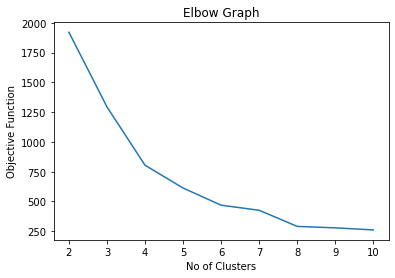

Second Initialization


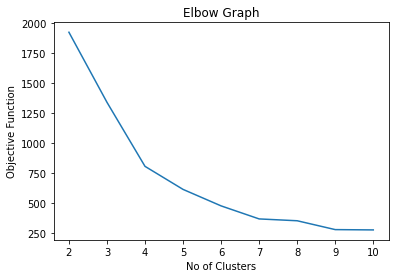

In [3]:
file = scipy.io.loadmat('AllSamples.mat')
Samp_X = []
Samp_Y = []
data = file.get('AllSamples')

for sample in data:
    Samp_X.append(sample[0])
    Samp_Y.append(sample[1])
ObjFunc1 = []
ObjFunc2 = []
for x in range(0, 2):

    K_Values = [2, 3, 4, 5, 6, 7, 8, 9, 10]
    # implement for k from 2 to 10
    for k in range(2, 11):
        print("K value:", k)
        centroids_array = []
        # Select the first centroid randomly from data.
        indices = np.random.choice(300, size=1, replace=False, p=None)

        for index in indices:
            centroids_array.append((data[index][0], data[index][1]))

        for i in range(1, k):
            strategy2 = []
            for sample in data:
                dista = 0
                for center in centroids_array:
                    dista = dista + distance.euclidean(sample, center)

                avg_distance = dista / len(centroids_array)
                strategy2.append(avg_distance)

            max_dist_index = strategy2.index(max(strategy2))
            centroids_array.append(data[max_dist_index])
        print("")
        print("Initial Cluster Centers:", centroids_array)
        print("")

        final_centroids = []
        final_cluster_matrix = []
        Stop_Cond = False
        while (Stop_Cond != True):
            # create a distances matrix
            distances = np.ndarray(shape=(300, k), dtype=float)

            # To compute distance from each cluster center to each data point.

            for i in range(len(data)):
                for j in range(k):
                    dist = distance.euclidean(data[i], centroids_array[j])
                    distances[i][j] = dist        
            # Assign datapoints to the nearest centroid.

            c_index = []

            for i in range(len(distances)):
                distance_list = distances[i].tolist()
                min_index = distance_list.index(min(distance_list))
                c_index.append(min_index)

            # Recalculating the cluster centroids.
            new_cluster_centroids = []

            cluster_matrix = []
            for i in range(k):
                cluster = []
                new_centre = (0, 0)
                xsum = 0
                ysum = 0

                for j in range(len(c_index)):
                    if (i == c_index[j]):
                        cluster.append(data[j])

                for l in range(len(cluster)):
                    xsum = xsum + cluster[l][0]
                    ysum = ysum + cluster[l][1]
                if len(cluster) != 0:
                    new_centre = (xsum / len(cluster), ysum / len(cluster))
                    new_cluster_centroids.append(new_centre)
                    cluster_matrix.append(cluster)
                else:
                    new_cluster_centroids.append(centroids_array[i])


            # stop if new cluster centroids are equal to previous ones.

            count = 0

            for i in range(k):
                if (new_cluster_centroids[i][0] == centroids_array[i][0] and new_cluster_centroids[i][1] == centroids_array[i][1]):
                    count = count + 1

            if (count == k):
                Stop_Cond = True
                final_centroids = new_cluster_centroids
                final_cluster_matrix = cluster_matrix
 
            if Stop_Cond == False:
                for i in range(k):
                    centroids_array[i] = new_cluster_centroids[i]


        print("Final Cluster Centers:", final_centroids)
        print("")


        # Calculating the Objective Function value
        obj_value = 0.0
        for i in range(k):
            current_center = final_centroids[i]
            for sample in final_cluster_matrix[i]:
                obj_value = obj_value + (
                            distance.euclidean(sample, current_center) * distance.euclidean(sample, current_center))
        if (x == 0):
            ObjFunc1.append(obj_value)
        else:
            ObjFunc2.append(obj_value)

# Plotting Objective Function vs k values
print("First Initialization")
plt.plot(K_Values, ObjFunc1)
plt.title('Elbow Graph')
plt.xlabel('No of Clusters')
plt.ylabel('Objective Function')
plt.show()

print("Second Initialization")
plt.plot(K_Values, ObjFunc2)
plt.title('Elbow Graph')
plt.xlabel('No of Clusters')
plt.ylabel('Objective Function')
plt.show()